# Introducing Atlantic Hurricane Season Forecasting

## About Atlantic Hurricane Forecasting
The Atlantic hurricane season is carefully watched by meteorologists and storm enthusiasts, the property (re)insurance world, and by the communities at risk. Tropical Cyclones have inflicted more than $1.4 trillion in damage to the United States since 1980 (CPI adjusted), making it easily the most costly disaster in the U.S. over that time period. 

Every year at the beginning of the hurricane season (which officially kicks off on June 1st), universities, private institutions and government agencies like the National Oceanic and Atmospheric Administration (NOAA) publish “hurricane season outlooks” that look at meteorological and ocean conditions and attempt to predict the number of hurricanes. Many of these forecasts also forecast how many major hurricanes (based on storm strength) or landfalling hurricanes (hurricanes that hit the mainland United States) will occur. For example, NOAA on 23 May 2024 published the article "NOAA predicts above-normal 2024 Atlantic hurricane season" detailing their official 2024 season forecast, forecasting "a range of 17 to 25 total named storms (winds of 39 mph or higher). Of those, 8 to 13 are forecast to become hurricanes (winds of 74 mph or higher), including 4 to 7 major hurricanes (category 3, 4 or 5; with winds of 111 mph or higher). Forecasters have a 70% confidence in these ranges."

Researchers at Colorado State University also publishes a well regarded annual hurricane season forecast several times throughout the year; in a July 9th report this year they predicted 25 named storms, 12 hurricanes, and 6 major hurricanes, all well above the 1991-2020 historical averages of 14.4 named storms, 7.2 hurricanes, and 3.2 major hurricanes. This year there was broad consensus that the conditions are ripe for an overly active hurricane season, and unfortunately that seems to have begun to materialize with Major Hurricane Beryl having become the earliest Category 5 hurricane on record in the Atlantic. Most forecasts mention higher than average (in fact, record-breaking) sea surface temperatures and La Nina conditions as factors expected to drive the busier-than-usual hurricane season.

Sources:
- NOAA National Centers for Environmental Information (NCEI) U.S. Billion-Dollar Weather and Climate Disasters (2024). https://www.ncei.noaa.gov/access/billions/, DOI: 10.25921/stkw-7w73
- https://www.noaa.gov/news-release/noaa-predicts-above-normal-2024-atlantic-hurricane-season
- https://tropical.colostate.edu/forecasting.html

## Historical Record of Hurricanes

The National Oceanic and Atmospheric Administration (NOAA) maintains a record of hurricanes, including track and intensity information, dating back to 1851 (though amount and quality of information is better in more recent records). This dataset, Atlantic HURDAT2, forms the basis for my target variables:

*Target Variable: Count of named storms, hurricanes, or major hurricanes occur in a given timeframe (e.g. year, month)*

The full hurdat dataset can be downloaded here: https://www.nhc.noaa.gov/data/
A cleaned version of the hurdat dataset has been saved in this project and is loaded below:

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
hurdat_cleaned = pd.read_csv('data/hurdat_cleaned.csv')
hurdat_cleaned.head()

,Unnamed: 0,date,time,record_id,status,latitude,longitude,max_wind,min_pressure,ne34ktr,...,se50ktr,sw50ktr,nw50ktr,ne64ktr,se64ktr,sw64ktr,nw64ktr,rad_max_wind,name,year
0,1,1851-06-25,0,NaN,HU,28.0N,94.8W,80.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,UNNAMED,1851
1,2,1851-06-25,600,NaN,HU,28.0N,95.4W,80.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,UNNAMED,1851
2,3,1851-06-25,1200,NaN,HU,28.0N,96.0W,80.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,UNNAMED,1851
3,4,1851-06-25,1800,NaN,HU,28.1N,96.5W,80.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,UNNAMED,1851
4,5,1851-06-25,2100,L,HU,28.2N,96.8W,80.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,UNNAMED,1851


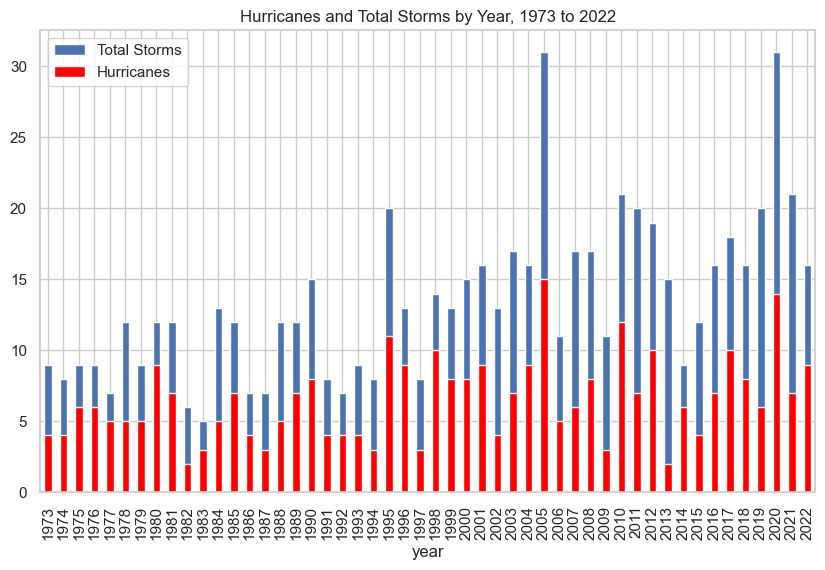

In [15]:
## Histogram: Number of Atlantic Storms per Year over last 50 years of record
hurdat_last50yrs = hurdat_cleaned[hurdat_cleaned['year'] >= 1973]

hurdat_last50yrs.groupby('year')['name'].nunique().plot(kind = 'bar')
hurdat_last50yrs_HU = hurdat_last50yrs[hurdat_last50yrs['status'] == 'HU']
plt1 = hurdat_last50yrs_HU.groupby('year')['name'].nunique().plot(kind = 'bar', 
                                                           color = 'red', figsize = (10,6),
                                                          title = 'Hurricanes and Total Storms by Year, 1973 to 2022')
plt1.legend(["Total Storms", "Hurricanes"])
#plt1.figure.savefig('barplot_stormcount_50yrs.pdf')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

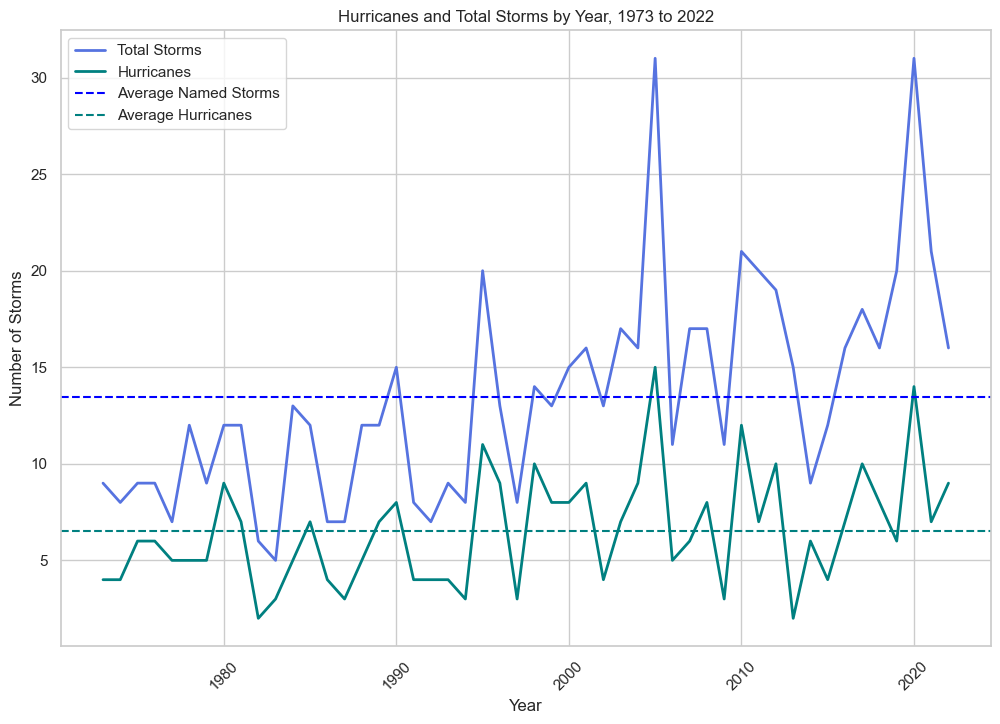

In [16]:
# Filter the data for the last 50 years
hurdat_last50yrs = hurdat_cleaned[hurdat_cleaned['year'] >= 1973]

# Group and count unique storm names by year
storms_by_year = hurdat_last50yrs.groupby('year')['name'].nunique().reset_index()
hurdat_last50yrs_HU = hurdat_last50yrs[hurdat_last50yrs['status'] == 'HU']
hurricanes_by_year = hurdat_last50yrs_HU.groupby('year')['name'].nunique().reset_index()

# Calculate averages
average_storms = storms_by_year['name'].mean()
average_hurricanes = hurricanes_by_year['name'].mean()

# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 10)  # Custom color palette with blues and teals

# Plotting the total storms by year
plt.figure(figsize=(12, 8))
#sns.barplot(x='year', y='name', data=storms_by_year, color=palette[0], label='Total Storms')

# Plotting the hurricanes by year on the same axes
# sns.barplot(x='year', y='name', data=hurricanes_by_year, color=palette[1], label='Hurricanes')
#sns.lineplot(x='year', y='name', data=hurricanes_by_year, color=palette[1], label='Hurricanes')

sns.lineplot(x='year', y='name', data=storms_by_year, color=palette[0], label='Total Storms', linewidth=2)

# Plotting the hurricanes by year on the same axes
sns.lineplot(x='year', y='name', data=hurricanes_by_year, color='teal', label='Hurricanes', linewidth=2)

# Add horizontal trendlines
plt.axhline(y=average_storms, color='blue', linestyle='--', label='Average Named Storms')
plt.axhline(y=average_hurricanes, color='teal', linestyle='--', label='Average Hurricanes')

# Add title and legend
plt.title('Hurricanes and Total Storms by Year, 1973 to 2022')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Number of Storms')

# Rotate x labels for better readability
plt.xticks(rotation=45)
plt.show()